# Chapter 4: Quantitative Finance and AI-Enhanced Mathematical Models

## 1. Traditional Quantitative Models: Stochastic Processes, Monte Carlo Simulations, Black-Scholes

Quantitative finance is built on a foundation of mathematical models that seek to describe and predict the behavior of financial markets. At the heart of these models are stochastic processes, which are mathematical objects that describe the evolution of random variables over time. One of the most fundamental stochastic processes used in finance is Geometric Brownian Motion (GBM), which is often used to model the price of financial assets like stocks. GBM assumes that the percentage returns of an asset are normally distributed and independent of each other.

While stochastic processes provide a theoretical framework for asset price movements, Monte Carlo simulations offer a powerful numerical method for solving problems that are difficult or impossible to solve analytically. In finance, Monte Carlo simulations are widely used for pricing complex derivatives, estimating the value at risk (VaR) of a portfolio, and simulating the performance of trading strategies. The Black-Scholes model, on the other hand, is a landmark achievement in financial engineering that provides a closed-form solution for the price of European-style options. It is based on a set of simplifying assumptions, such as the asset price following a GBM and the absence of transaction costs or arbitrage opportunities.

In [1]:
# Example: Calculating trading-specific evaluation metrics
import numpy as np
import pandas as pd

def calculate_profit_factor(returns):
    """Calculates the profit factor from a series of returns."""
    gross_profits = np.sum(returns[returns > 0])
    gross_losses = np.abs(np.sum(returns[returns < 0]))
    
    if gross_losses == 0:
        return np.inf # Avoid division by zero if there are no losses
        
    return gross_profits / gross_losses

def calculate_hit_ratio(returns):
    """Calculates the hit ratio (win rate) from a series of returns."""
    positive_returns = np.sum(returns > 0)
    total_trades = len(returns)
    
    if total_trades == 0:
        return 0.0
        
    return positive_returns / total_trades

# Simulate a series of trade returns (e.g., in percentage)
trade_returns = pd.Series([0.5, -0.2, 1.1, 0.8, -0.4, -0.1, 2.5, -1.0, 0.3, 0.9])

# Calculate metrics
profit_factor = calculate_profit_factor(trade_returns)
hit_ratio = calculate_hit_ratio(trade_returns)

print(f"Simulated Trade Returns:\\n{trade_returns.values}")
print(f"\\nProfit Factor: {profit_factor:.2f}")
print(f"Hit Ratio: {hit_ratio:.2f}")

Simulated Trade Returns:\n[ 0.5 -0.2  1.1  0.8 -0.4 -0.1  2.5 -1.   0.3  0.9]
\nProfit Factor: 3.59
Hit Ratio: 0.60


## 2. Portfolio Theory Evolution: From Markowitz to AI-Enhanced Optimization

Modern Portfolio Theory (MPT), introduced by Harry Markowitz in 1952, was a revolutionary concept that laid the groundwork for modern portfolio management. The core idea of MPT is that investors can construct portfolios to maximize expected return for a given level of risk (or minimize risk for a given level of expected return). The key insight is that the risk of a portfolio is not just the weighted average of the individual asset risks, but also depends on the correlations between the assets. By combining assets with low or negative correlations, investors can reduce the overall portfolio risk without sacrificing returns. This is the principle of diversification.

However, the original Markowitz model has some practical limitations. It is highly sensitive to the inputs, particularly the estimates of expected returns and the covariance matrix. These inputs are notoriously difficult to estimate accurately, and small changes in these estimates can lead to large changes in the optimal portfolio weights. This is where AI can play a crucial role. Machine learning models can be used to generate more accurate and robust estimates of expected returns and covariances, by capturing complex non-linear patterns in the data. AI can also be used to incorporate alternative data sources, such as news sentiment or satellite imagery, into the portfolio optimization process, leading to more informed and potentially more profitable investment decisions.

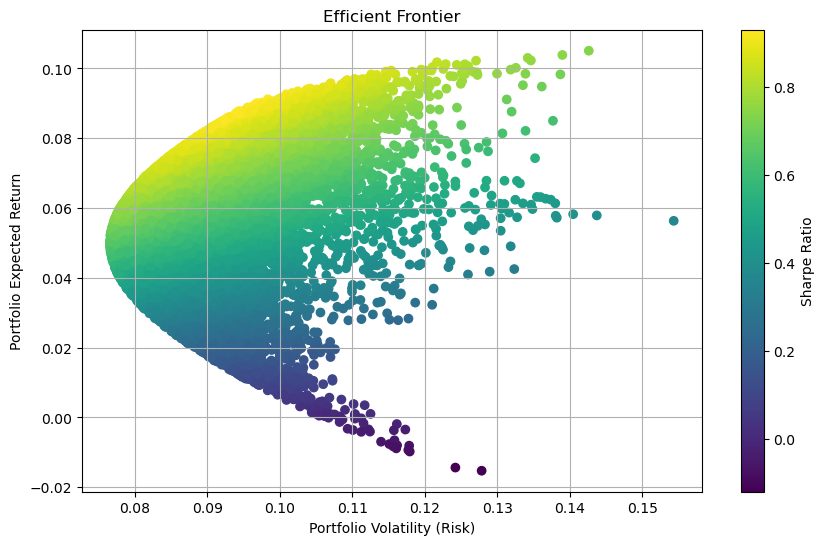

In [2]:
# Example: Markowitz Portfolio Optimization and the Efficient Frontier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Generate synthetic asset returns ---
np.random.seed(42)
num_assets = 4
num_portfolios = 25000
returns_data = pd.DataFrame(np.random.randn(100, num_assets) / 100, columns=[f'Asset_{i}' for i in range(num_assets)])

# --- Calculate expected returns and covariance ---
expected_returns = returns_data.mean()
cov_matrix = returns_data.cov()

# --- Simulate random portfolios ---
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate portfolio return and volatility
    portfolio_return = np.sum(expected_returns * weights) * 252 # Annualized
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252) # Annualized
    
    # Store results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = results[0,i] / results[1,i] # Sharpe Ratio

# --- Plot the Efficient Frontier ---
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Volatility (Risk)')
plt.ylabel('Portfolio Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

## 3. Risk Metrics and Greeks: Calculation and AI-Based Prediction

Effective risk management is a cornerstone of successful trading. A key part of this is understanding and quantifying the various risks to which a portfolio is exposed. In the world of derivatives, this is often done using the "Greeks", which are a set of risk measures that describe the sensitivity of a derivative's price to changes in underlying parameters. By calculating and monitoring the Greeks, traders can hedge their positions and manage their risk exposure more effectively.

The most common Greeks include:

- Delta (Δ): Measures the rate of change of the option price with respect to a change in the underlying asset's price.
- Gamma (Γ): Measures the rate of change in the delta with respect to a change in the underlying asset's price.
- Vega (ν): Measures the sensitivity of the option price to a change in the volatility of the underlying asset.
- Theta (Θ): Measures the sensitivity of the option price to the passage of time (time decay).

While the Greeks can be calculated analytically for simple options using models like Black-Scholes, this is often not possible for more complex, exotic derivatives. In these cases, AI models can be used to learn the relationship between the input parameters and the derivative's price, and then use this learned relationship to approximate the Greeks. This can provide traders with a powerful tool for managing the risk of even the most complex financial instruments.

In [3]:
# Example: Calculating Option Greeks
import numpy as np
from scipy.stats import norm

def calculate_greeks(S, K, T, r, sigma):
    """
    Calculates the Greeks for a European call option.
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Delta: Sensitivity to underlying price
    delta = norm.cdf(d1)
    
    # Gamma: Sensitivity of Delta to underlying price
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    
    # Vega: Sensitivity to volatility
    vega = S * norm.pdf(d1) * np.sqrt(T) / 100 # Per 1% change in vol
    
    # Theta: Sensitivity to time decay (per day)
    theta_part1 = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
    theta_part2 = - r * K * np.exp(-r * T) * norm.cdf(d2)
    theta = (theta_part1 + theta_part2) / 365 # Per day
    
    return {'delta': delta, 'gamma': gamma, 'vega': vega, 'theta': theta}

# --- Parameters ---
S0 = 100      # Initial stock price
K = 105       # Strike price
T = 1.0       # Time to maturity (1 year)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility

# --- Calculation ---
greeks = calculate_greeks(S0, K, T, r, sigma)

print("Option Greeks:")
for key, value in greeks.items():
    print(f"- {key.capitalize():<6}: {value:.4f}")

Option Greeks:
- Delta : 0.5422
- Gamma : 0.0198
- Vega  : 0.3967
- Theta : -0.0172


## 4. Market Regime Detection and Regime-Aware Modeling

Financial markets do not behave in the same way all the time. Instead, they go through different phases, or "regimes", characterized by distinct statistical properties, such as volatility, correlation, and momentum. For example, a market might be in a bull regime, a bear regime, or a high-volatility regime. Identifying these regimes is crucial for developing robust trading strategies, as a strategy that performs well in one regime may perform poorly in another.

Market regime detection is the process of identifying the current market regime in real-time. This can be done using a variety of techniques, from simple rule-based systems to more sophisticated machine learning models. Some common approaches include:

- Moving Average Crossovers: A simple technical indicator that can be used to identify changes in trend.
- Volatility Clustering: The tendency of high-volatility periods to be followed by other high-volatility periods, and vice versa.
- Hidden Markov Models (HMMs): A powerful statistical model that can be used to model systems that transition between a set of unobserved (hidden) states.
- Clustering Algorithms (e.g., K-Means): These can be used to group similar market periods together based on a set of features, such as returns, volatility, and correlations.


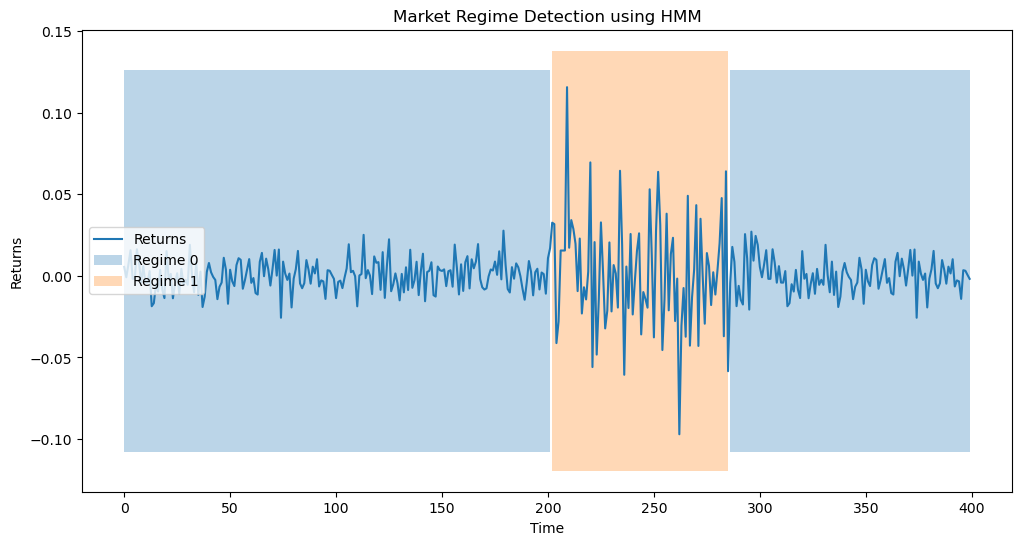

\n--- Regime 0 ---
Mean: 0.00007
Volatility (Std Dev): 0.01110
\n--- Regime 1 ---
Mean: 0.00161
Volatility (Std Dev): 0.03489


In [4]:
# Example: Market Regime Detection with a Hidden Markov Model (HMM)
# You may need to install hmmlearn: pip install hmmlearn
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

# --- Generate synthetic returns data with two regimes ---
np.random.seed(42)
regime1 = np.random.normal(0.0005, 0.01, 200)  # Low volatility regime
regime2 = np.random.normal(0.0001, 0.03, 100)  # High volatility regime
returns = np.concatenate([regime1, regime2, regime1[:100]])
returns = pd.DataFrame(returns, columns=['returns'])

# --- Fit the HMM ---
model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000, random_state=42)
model.fit(returns[['returns']])

# Predict the hidden states (regimes)
hidden_states = model.predict(returns[['returns']])

# --- Plot the results ---
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['returns'], label="Returns")
plt.fill_between(returns.index, plt.ylim()[0], plt.ylim()[1], where=hidden_states == 0, alpha=0.3, label="Regime 0")
plt.fill_between(returns.index, plt.ylim()[0], plt.ylim()[1], where=hidden_states == 1, alpha=0.3, label="Regime 1")
plt.title('Market Regime Detection using HMM')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Print the learned parameters of each regime
for i in range(model.n_components):
    print(f"\\n--- Regime {i} ---")
    print(f"Mean: {model.means_[i][0]:.5f}")
    print(f"Volatility (Std Dev): {np.sqrt(model.covars_[i][0][0]):.5f}")


## 5. Hybrid AI-Quantitative Approaches: ML-Enhanced Factor Models

Factor models are a cornerstone of quantitative finance, used to explain and predict asset returns. These models posit that the returns of an asset can be explained by its exposure to a set of common risk factors. The most famous example is the Fama-French three-factor model, which suggests that the returns of a stock can be explained by its exposure to three factors: the overall market risk, the size of the company (small-cap vs. large-cap), and its value (value vs. growth stocks).

While traditional factor models are based on linear regression, AI can be used to enhance these models in several ways. Machine learning algorithms can be used to identify new, non-linear factors that are not captured by traditional models. They can also be used to model the non-linear relationships between the factors and asset returns, leading to more accurate predictions. For example, a neural network could be trained to learn the complex interactions between various macroeconomic factors, fundamental data, and stock returns, potentially uncovering new sources of alpha that are not available to traditional factor investors.

In [4]:
# Example: ML-Enhanced Factor Model
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# --- Generate synthetic data ---
np.random.seed(42)
n_samples = 500
# Traditional linear factors
factor_market = np.random.randn(n_samples, 1)
factor_value = np.random.randn(n_samples, 1)
# A non-linear factor (e.g., from alternative data)
factor_nonlinear = np.sin(factor_market) * 2 + np.random.randn(n_samples, 1) * 0.5

# Combine factors
X = np.hstack([factor_market, factor_value, factor_nonlinear])

# Create synthetic returns with a non-linear relationship
y = 0.5 * factor_market + 0.3 * factor_value + 0.8 * factor_nonlinear + np.random.randn(n_samples, 1) * 0.2
y = y.ravel()

# --- Train an ML model ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# --- Evaluate the model ---
score = model.score(X_test, y_test)
print(f"Model R-squared on test data: {score:.4f}")

# --- Feature Importances ---
feature_importances = pd.Series(model.feature_importances_, index=['Market', 'Value', 'Non-Linear']).sort_values(ascending=False)
print("\\nFeature Importances:")
print(feature_importances)

Model R-squared on test data: 0.9694
\nFeature Importances:
Non-Linear    0.729829
Market        0.239103
Value         0.031069
dtype: float64


## 6. Quantitative Strategy Design: From Hypothesis to Implementation

The process of designing a quantitative trading strategy is a systematic and iterative one, which can be broken down into a series of steps. It begins with an idea or a hypothesis about a potential market inefficiency, and ends with the deployment of a fully automated trading system. A rigorous and disciplined approach is essential to avoid common pitfalls like overfitting and look-ahead bias.

The key steps in the quantitative strategy design process are as follows:

- Hypothesis Generation: The process starts with an idea for a trading strategy. This could be based on an economic theory, a market inefficiency, a behavioral bias, or a pattern discovered through data mining.
- Data Collection and Preprocessing: Once a hypothesis has been formulated, the next step is to collect the necessary data to test it. This may include historical price and volume data, fundamental data, macroeconomic data, and alternative data.
- Factor Selection and Feature Engineering: The raw data is then transformed into a set of predictive features (factors) that will be used as inputs to the trading model.
- Backtesting: This is the crucial step of testing the strategy on historical data to assess its performance. A rigorous backtesting process should be used to avoid overfitting and to obtain a realistic estimate of the strategy's out-of-sample performance.
- Implementation and Execution: Once a strategy has been shown to be profitable in backtesting, it can be implemented for live trading. This involves setting up the necessary infrastructure, connecting to a broker, and managing the day-to-day operations of the trading system.

/var/folders/98/pgyvqp115_q7lctf5vvv65gr0000gp/T/ipykernel_45215/62756284.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_wind

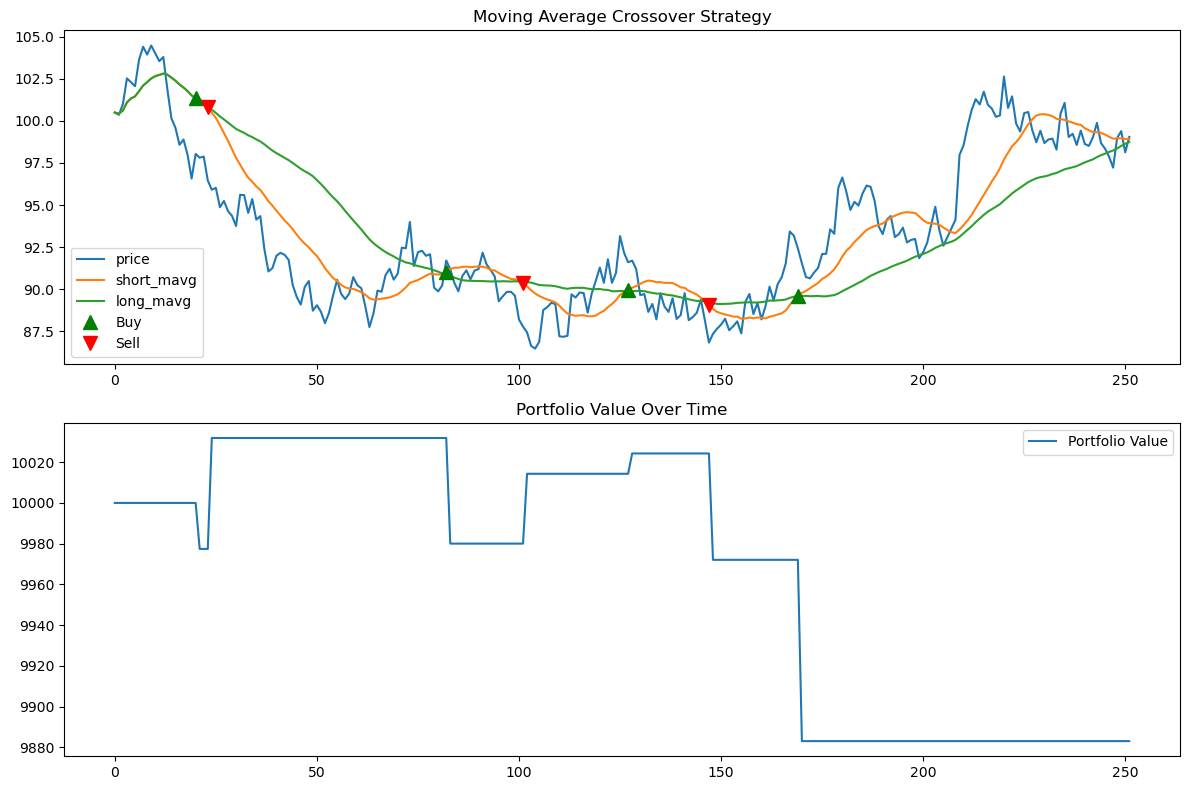

In [6]:
# Example: Simple Backtest of a Moving Average Crossover Strategy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Generate synthetic price data ---
np.random.seed(42)
prices = pd.Series(100 + np.random.randn(252).cumsum())

# --- Strategy Definition ---
short_window = 20
long_window = 50

signals = pd.DataFrame(index=prices.index)
signals['price'] = prices
signals['short_mavg'] = prices.rolling(window=short_window, min_periods=1).mean()
signals['long_mavg'] = prices.rolling(window=long_window, min_periods=1).mean()

# Generate signal: 1.0 when short mavg > long mavg, else 0.0
signals['signal'] = 0.0
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# --- Backtest ---
initial_capital = float(10000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['stock'] = 100 * signals['positions'] # Buy 100 shares

portfolio = positions.multiply(signals['price'], axis=0)
pos_diff = positions.diff()

portfolio['holdings'] = (positions.multiply(signals['price'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['price'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

# --- Plot Results ---
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 1, 1)
signals[['price', 'short_mavg', 'long_mavg']].plot(ax=ax1)
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize=10, color='g', label='Buy')
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v', markersize=10, color='r', label='Sell')
plt.title('Moving Average Crossover Strategy')
plt.legend()

ax2 = plt.subplot(2, 1, 2)
portfolio['total'].plot(ax=ax2)
plt.title('Portfolio Value Over Time')
plt.legend(['Portfolio Value'])
plt.tight_layout()
plt.show()

# print(f"Final Portfolio Value: ${portfolio['total'][-1]:.2f}")

## 7. Performance Attribution and Factor Analysis

Performance attribution is a set of techniques used to explain the sources of a portfolio's returns. It seeks to answer the question: "Where did the returns come from?" By decomposing the portfolio's performance into the contributions of various factors, performance attribution can provide valuable insights into the drivers of a strategy's success or failure. This can help in refining the strategy, managing risk, and communicating the investment process to stakeholders.

There are several different models for performance attribution, but they all share the common goal of breaking down the portfolio's excess return (the return above a benchmark) into a set of components. Some common components include:

- Asset Allocation: The contribution of the decisions to overweight or underweight certain asset classes, sectors, or countries.
- Security Selection: The contribution of the ability to pick winning securities within each asset class.
- Factor Exposures: The contribution of the portfolio's exposure to various risk factors, such as the market, size, value, and momentum.
- Interaction Effects: The combined effect of asset allocation and security selection decisions.

In [2]:
# Example: Simple Factor Analysis (CAPM Alpha and Beta)
import pandas as pd
import numpy as np
import statsmodels.api as sm

# --- Generate synthetic returns ---
np.random.seed(42)
# Market returns
market_returns = pd.Series(np.random.randn(100) / 100 + 0.0005)
# Portfolio returns (with some alpha)
portfolio_returns = 0.0002 + (1.2 * market_returns) + np.random.randn(100) / 100 * 0.5
risk_free_rate = 0.0001

# --- Calculate excess returns ---
portfolio_excess_returns = portfolio_returns - risk_free_rate
market_excess_returns = market_returns - risk_free_rate

# --- Perform Regression ---
# Add a constant (intercept) to the market returns for the regression model
X = sm.add_constant(market_excess_returns)
model = sm.OLS(portfolio_excess_returns, X).fit()

# --- Extract Alpha and Beta ---
# Beta is the coefficient of the market returns
beta = model.params.iloc[1]
# Alpha is the intercept of the regression (annualized)
alpha = model.params.iloc[0] * 252 # Assuming daily data

print(model.summary())
print("\n--- Performance Attribution ---")
print(f"Annualized Alpha: {alpha*100:.4f}%")
print(f"Beta: {beta:.4f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     461.2
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           7.68e-39
Time:                        08:56:21   Log-Likelihood:                 394.12
No. Observations:                 100   AIC:                            -784.2
Df Residuals:                      98   BIC:                            -779.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.600      0.5

# Summary

Chapter 4 introduces stochastic modeling, portfolio theory, risk metrics, regime detection, and hybrid AI-quant approaches with practical simulation examples.